<a href="https://colab.research.google.com/github/gullgae/c-/blob/main/%EC%A7%84%EC%A7%9C%EC%B0%90_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


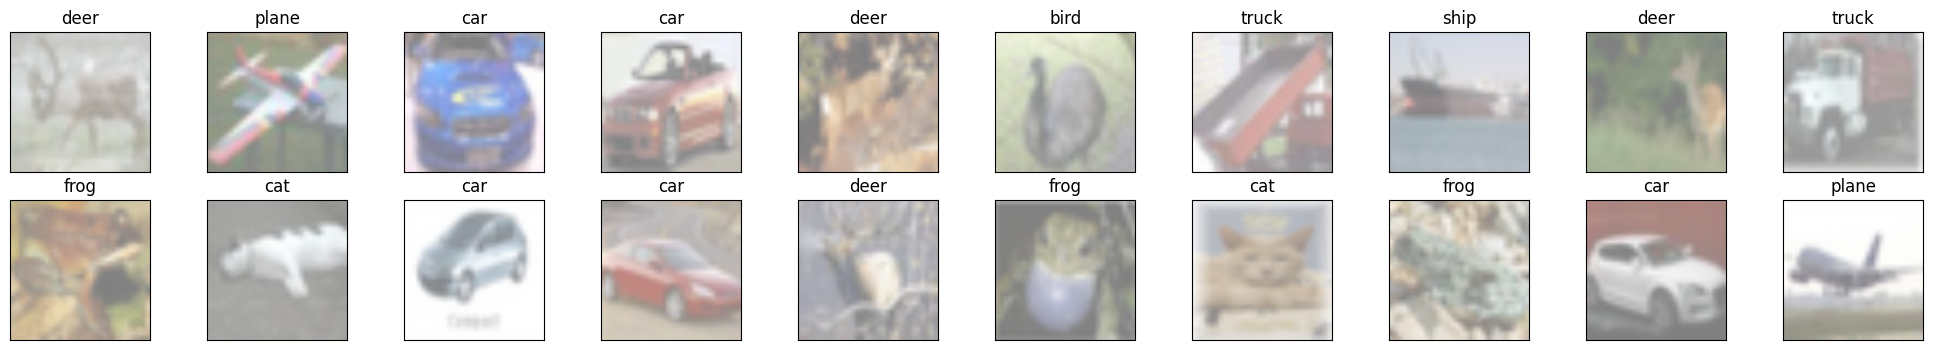

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch.nn import functional as F
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import inception_v3
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import torch.nn as nn
from PIL import Image
import torchvision

# CIFAR-10 데이터셋을 로드하고 전처리합니다.
transformer = transforms.Compose([
    transforms.Resize((299, 299)),  # Inception V3 모델의 입력 크기에 맞게 조정합니다.
    transforms.ToTensor()
])
training_dataset = CIFAR10(root='./data', train=True, download=True, transform=transformer)
validation_dataset = CIFAR10(root='./data', train=False, download=True, transform=transformer)

training_loader = DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)





def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()  # 텐서를 CPU로 이동하고 numpy 배열로 변환합니다.
    image = image.transpose(1, 2, 0)
    image = image * np.array([0.5, 0.5, 0.5]) + np.array([0.5, 0.5, 0.5])
    image = image.clip(0, 1)
    return image 

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

class_to_idx = {classes[i]: i for i in range(len(classes))}

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_dataset.targets = [class_to_idx[classes[label]] for label in train_dataset.targets]

dataiter = iter(training_loader)
images, labels = next(dataiter)

fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[i]))
    ax.set_title(classes[labels[i].item()])

plt.show()

In [28]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt


In [29]:

print(len( training_dataset))

50000


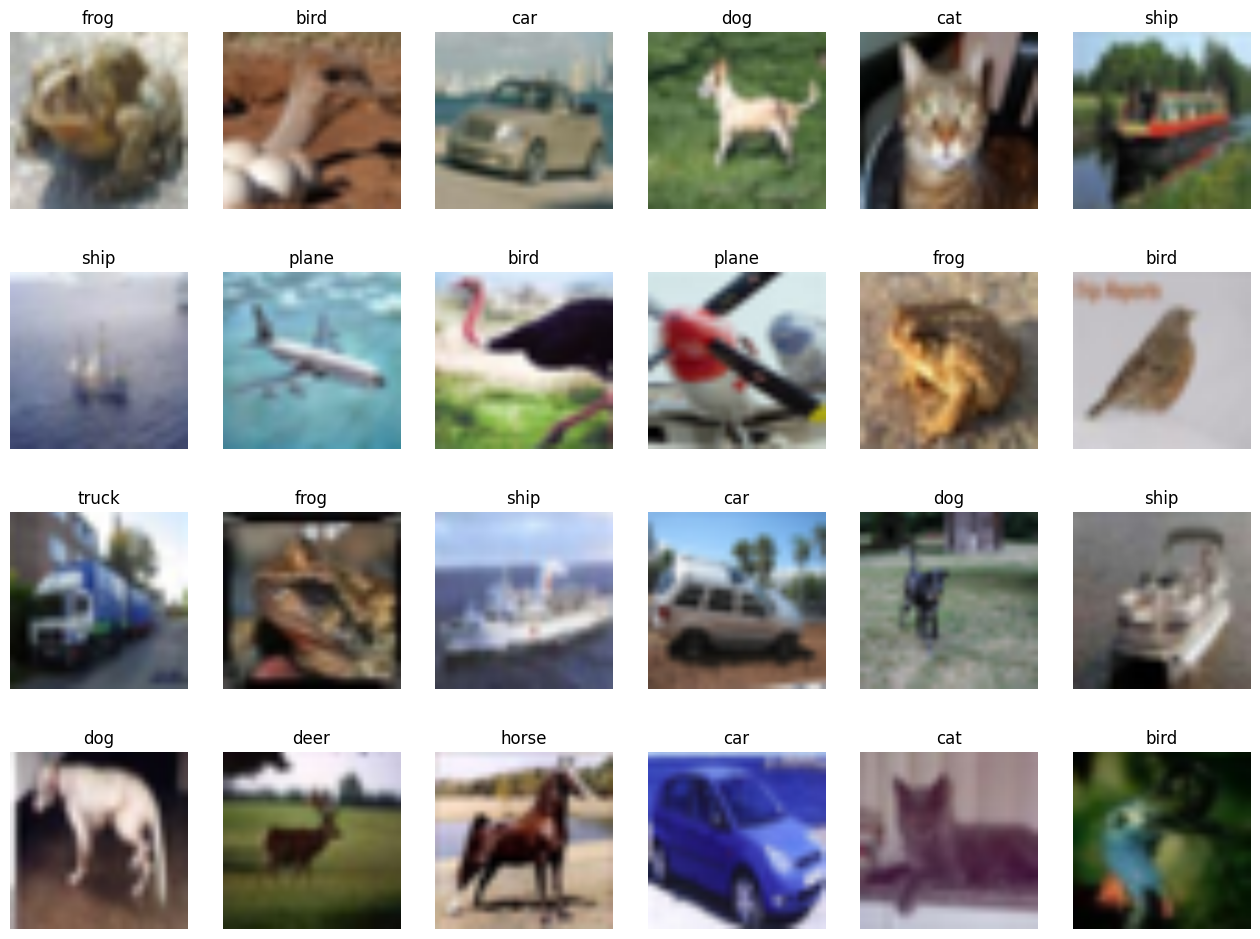

In [30]:
samples, labels = next(iter(training_loader))
#samples, labels = iter(train_loader).next()
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
fig = plt.figure(figsize=(16,24))
for i in range(24):
    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [31]:
inception_v3 = models.inception_v3(pretrained=True)

In [49]:
# 합성곱층에 대해 학습을 수행하지 않도록 설정 (requires_grad = False)
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
            
set_parameter_requires_grad(inception_v3)


inception_v3.fc = nn.Linear(2048, 10)
inception_v3_aux = models.inception_v3(pretrained=True, aux_logits=True)
inception_v3_aux.aux_logits = False
inception_v3_aux.Conv2d_1a_3x3.conv = nn.Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
inception_v3 = nn.Sequential(inception_v3_aux, nn.Linear(2048, 10))


In [50]:
for name, param in inception_v3.named_parameters():
    if param.requires_grad:
        print(name, param.data)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
    

In [59]:
model = models.inception_v3(pretrained = True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(2048, 10)
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [60]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()    
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)        
        torch.save(model.state_dict(), os.path.join('./catanddog/', '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))    
    return acc_history, loss_history

In [61]:
params_to_update = []
for name,param in inception_v3.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 0.Conv2d_1a_3x3.conv.weight
	 0.Conv2d_1a_3x3.bn.weight
	 0.Conv2d_1a_3x3.bn.bias
	 0.Conv2d_2a_3x3.conv.weight
	 0.Conv2d_2a_3x3.bn.weight
	 0.Conv2d_2a_3x3.bn.bias
	 0.Conv2d_2b_3x3.conv.weight
	 0.Conv2d_2b_3x3.bn.weight
	 0.Conv2d_2b_3x3.bn.bias
	 0.Conv2d_3b_1x1.conv.weight
	 0.Conv2d_3b_1x1.bn.weight
	 0.Conv2d_3b_1x1.bn.bias
	 0.Conv2d_4a_3x3.conv.weight
	 0.Conv2d_4a_3x3.bn.weight
	 0.Conv2d_4a_3x3.bn.bias
	 0.Mixed_5b.branch1x1.conv.weight
	 0.Mixed_5b.branch1x1.bn.weight
	 0.Mixed_5b.branch1x1.bn.bias
	 0.Mixed_5b.branch5x5_1.conv.weight
	 0.Mixed_5b.branch5x5_1.bn.weight
	 0.Mixed_5b.branch5x5_1.bn.bias
	 0.Mixed_5b.branch5x5_2.conv.weight
	 0.Mixed_5b.branch5x5_2.bn.weight
	 0.Mixed_5b.branch5x5_2.bn.bias
	 0.Mixed_5b.branch3x3dbl_1.conv.weight
	 0.Mixed_5b.branch3x3dbl_1.bn.weight
	 0.Mixed_5b.branch3x3dbl_1.bn.bias
	 0.Mixed_5b.branch3x3dbl_2.conv.weight
	 0.Mixed_5b.branch3x3dbl_2.bn.weight
	 0.Mixed_5b.branch3x3dbl_2.bn.bias
	 0.Mixed_5b.branch3x3dbl_3.conv.weight
	 0

In [62]:


class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
dataset.class_to_idx = class_to_idx



Files already downloaded and verified


In [63]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True
)

In [64]:
inception_v3.fc = nn.Linear(2048, 10)


In [66]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(inception_v3, train_loader, criterion, optimizer, device)

Epoch 0/12
----------


RuntimeError: ignored